<a href="https://colab.research.google.com/github/careldelvine/Case-Study/blob/main/Case_Study_Credit_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [380]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

## Extracting data sources 

In [381]:
# Reading credit record file
credit_record = pd.read_csv('https://raw.githubusercontent.com/careldelvine/Credit-Risk-Analysis/main/credit_record.csv')

# Reading application record file
application_record = pd.read_csv('https://raw.githubusercontent.com/careldelvine/Credit-Risk-Analysis/main/application_record.csv')

In [382]:
print("Number of datapoints for credit records: {}".format(len(credit_record)))
print("Number of unique clients in dataset: {}".format(len(credit_record.ID.unique())))

Number of datapoints for credit records: 1048575
Number of unique clients in dataset: 45985


In [383]:
print("Number of datapoints for application records: {}".format(len(application_record)))
print("Number of unique clients in dataset: {}".format(len(application_record.ID.unique())))

Number of datapoints for application records: 438557
Number of unique clients in dataset: 438510


In [384]:
# Checking intersection between two datasets
len(set(credit_record['ID']).intersection(set(application_record['ID']))) 

36457

## Checking for missing values

Text(0.5, 1.0, 'Missing Data for credit records dataset')

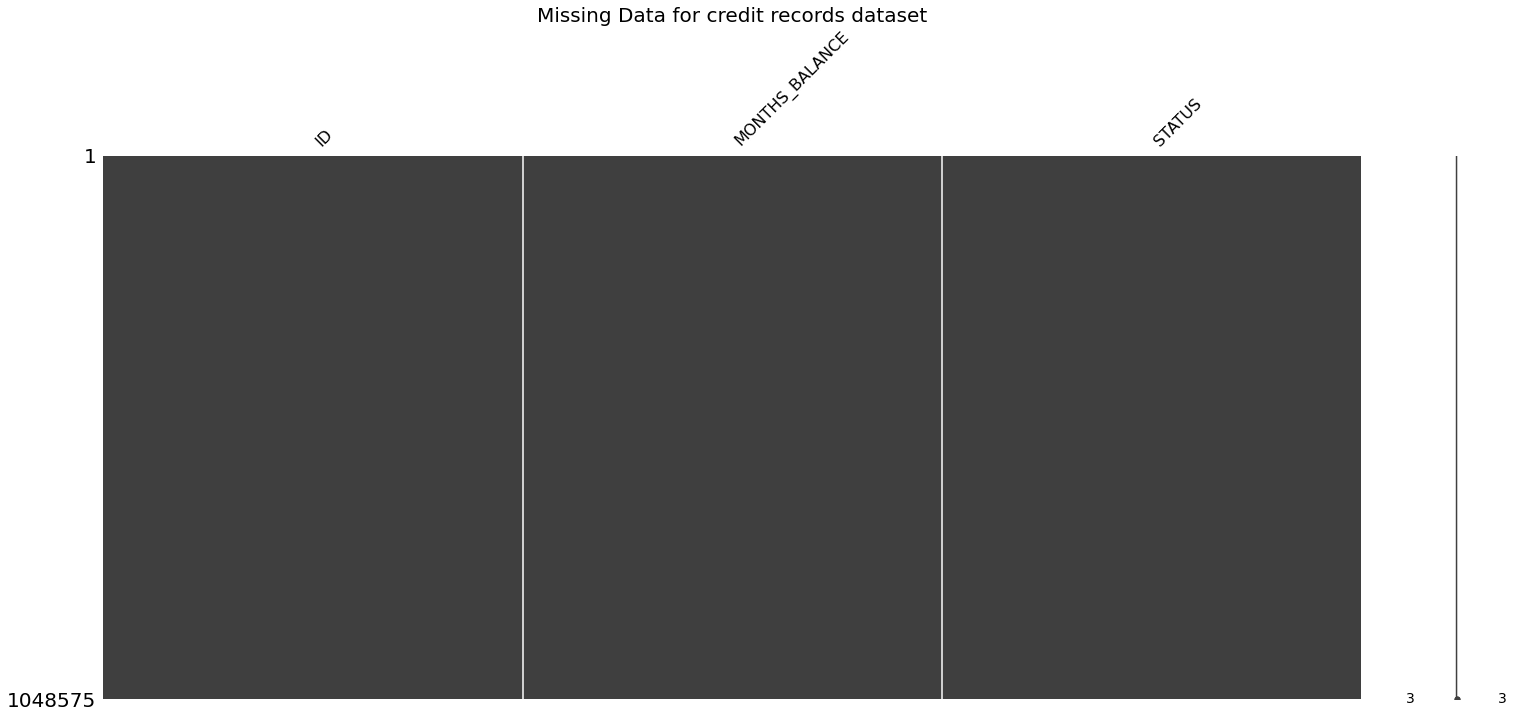

In [385]:
# Checking the missing values in the credit records dataset

credit_missing = msno.matrix(credit_record)
credit_missing.set_title("Missing Data for credit records dataset",fontsize=20)

Text(0.5, 1.0, 'Missing Data for application records dataset')

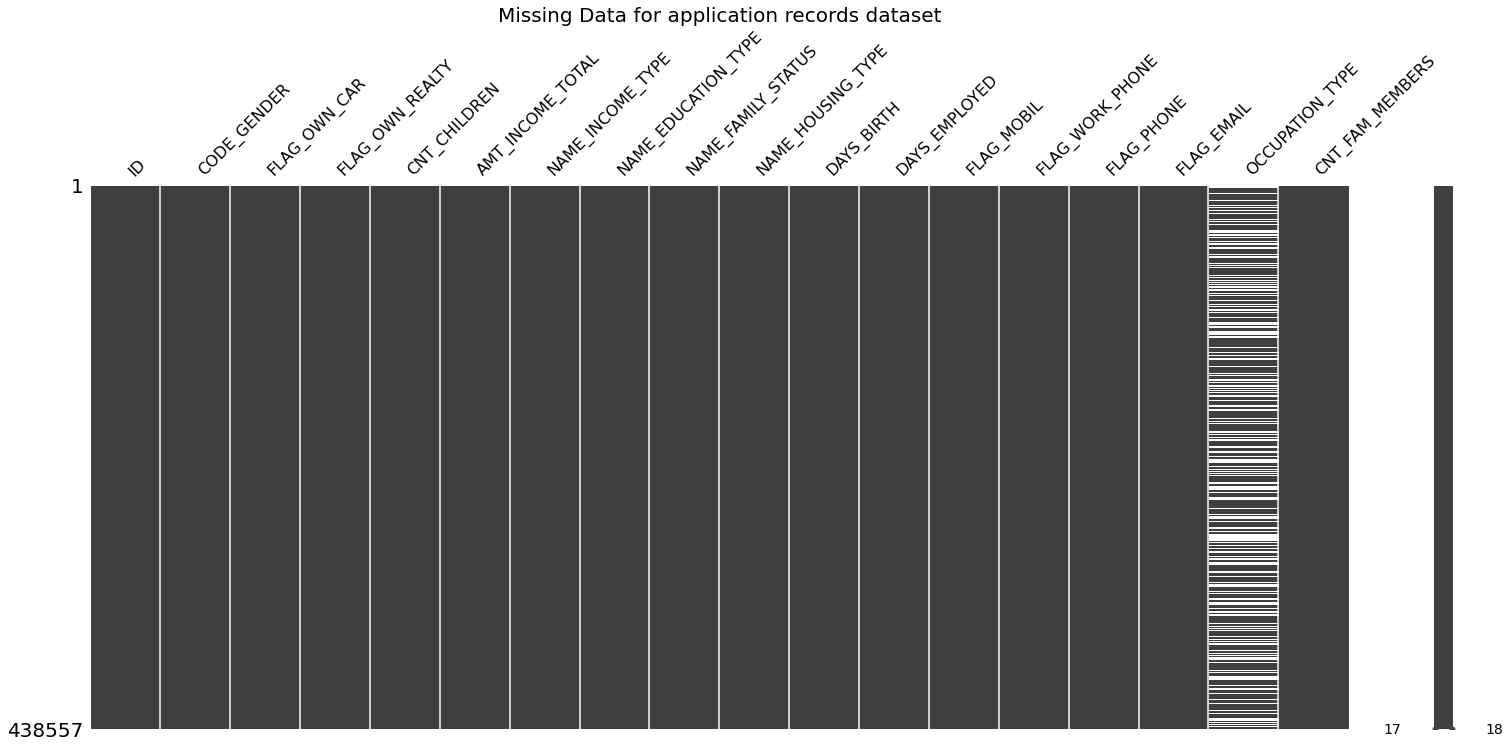

In [386]:
# Checking the missing values in the application records dataset

application_missing = msno.matrix(application_record)
application_missing.set_title("Missing Data for application records dataset",fontsize=20)

In [387]:
# Checking the unique values in the credit records dataset

credit_unique = pd.DataFrame.from_records([(col, credit_record[col].nunique()) for col in credit_record.columns], columns=['Description', 'Unique Values']).sort_values(by=['Unique Values'])
credit_unique

,Description,Unique Values
2,STATUS,8
1,MONTHS_BALANCE,61
0,ID,45985


In [388]:
# Checking the unique values in the application records dataset

application_unique = pd.DataFrame.from_records([(col, application_record[col].nunique()) for col in application_record.columns], columns=['Description', 'Unique Values']).sort_values(by=['Unique Values'])
application_unique

,Description,Unique Values
12,FLAG_MOBIL,1
1,CODE_GENDER,2
2,FLAG_OWN_CAR,2
3,FLAG_OWN_REALTY,2
15,FLAG_EMAIL,2
14,FLAG_PHONE,2
13,FLAG_WORK_PHONE,2
8,NAME_FAMILY_STATUS,5
6,NAME_INCOME_TYPE,5
7,NAME_EDUCATION_TYPE,5


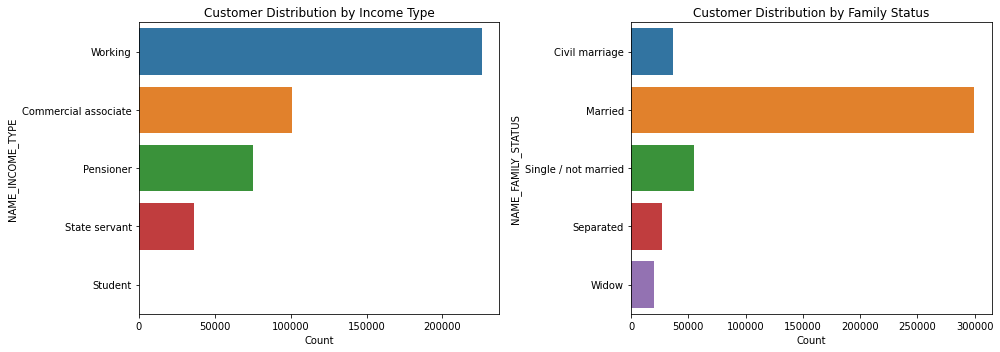

In [389]:
fig, axes = plt.subplots(1,2)

g1=sns.countplot(y=application_record.NAME_INCOME_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Income Type")
g1.set_xlabel("Count")

g2=sns.countplot(y=application_record.NAME_FAMILY_STATUS,linewidth=1.2, ax=axes[1])
g2.set_title("Customer Distribution by Family Status")
g2.set_xlabel("Count")

fig.set_size_inches(14,5)

plt.tight_layout()


plt.show()

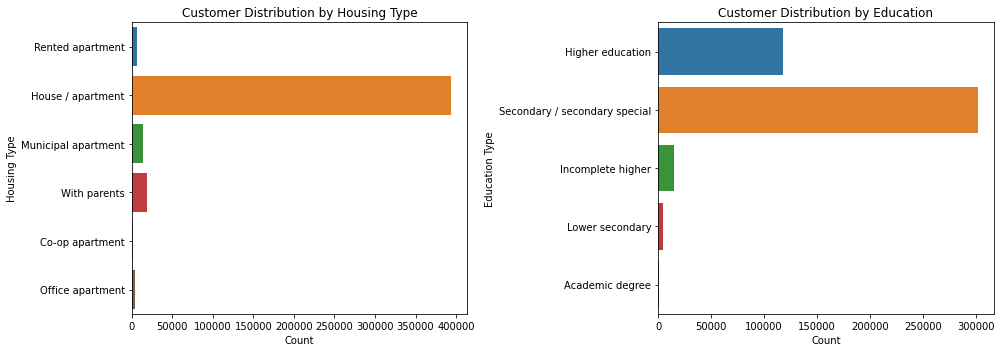

In [390]:
fig, axes = plt.subplots(1,2)

g1= sns.countplot(y=application_record.NAME_HOUSING_TYPE,linewidth=1.2, ax=axes[0])
g1.set_title("Customer Distribution by Housing Type")
g1.set_xlabel("Count")
g1.set_ylabel("Housing Type")

g2= sns.countplot(y=application_record.NAME_EDUCATION_TYPE, ax=axes[1])
g2.set_title("Customer Distribution by Education")
g2.set_xlabel("Count")
g2.set_ylabel("Education Type")

fig.set_size_inches(14,5)

plt.tight_layout()


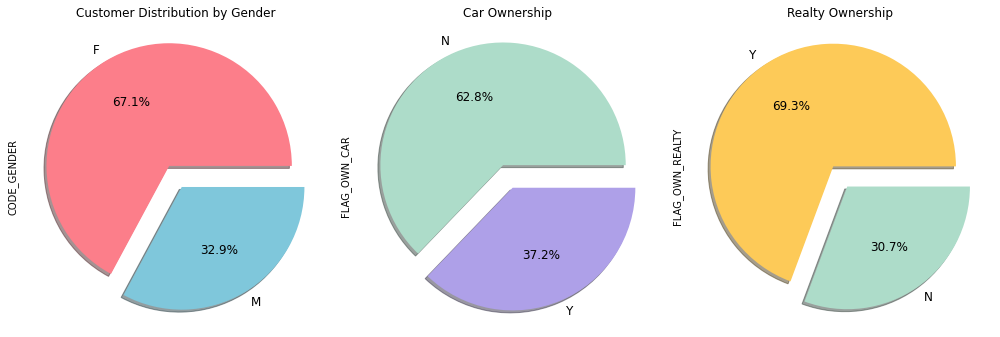

In [391]:
fig, axes = plt.subplots(1,3)

g1= application_record['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#FC7E8A","#7FC7DB"],textprops = {'fontsize':12}, ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= application_record['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#ADDCC9","#AEA0E8"],textprops = {'fontsize':12}, ax=axes[1])
g2.set_title("Car Ownership")

g3= application_record['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#FDCA58","#ADDCC9"],textprops = {'fontsize':12}, ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

In [392]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [393]:
# Cleaning the application record dataset
application_record = application_record.drop_duplicates('ID', keep='last') 
application_record.drop('OCCUPATION_TYPE', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [394]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

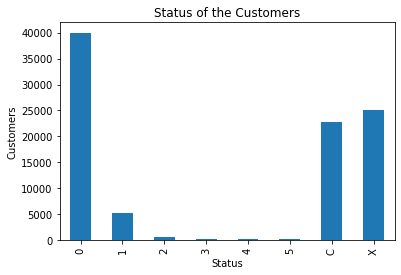

In [395]:
# Analyzing the credit record dataset

history = credit_record.groupby('ID')['STATUS'].value_counts()
customer_status=history.groupby('STATUS').count()
g1 = customer_status.plot(kind='bar')
g1.set_title("Status of the Customers")
g1.set_xlabel("Status")
g1.set_ylabel("Customers")

plt.show()

In [396]:
credit_record.groupby('STATUS').count()
credit_due=pd.get_dummies(data=credit_record,columns=['STATUS'], prefix='',prefix_sep='').groupby('ID')[sorted(credit_record['STATUS'].unique().tolist())].sum()
credit_due=credit_due.rename(columns=
                      {'0':'Pastdue_1_29',
                       '1':'Pastdue_30_59',
                       '2':'Pastdue_60_89',
                       '3':'Pastdue_90_119',
                       '4':'Pastdue_120_149',
                       '5':'Pastdue_Over_150',
                       'C':'Paid_off',
                       'X':'No_Loan'})

Overall_Pastdue=['Pastdue_1_29','Pastdue_30_59',	'Pastdue_60_89',	'Pastdue_90_119'	,'Pastdue_120_149',	'Pastdue_Over_150']
credit_due['Number_of_Months']=credit_record.groupby('ID')['MONTHS_BALANCE'].count()
credit_due['Over_90']=credit_due[['Pastdue_90_119'	,'Pastdue_120_149'	,'Pastdue_Over_150']].sum(axis=1)
credit_due['Less_90']=credit_due[['Pastdue_1_29','Pastdue_30_59',	'Pastdue_60_89']].sum(axis=1)
credit_due['Overall_Pastdue']=credit_due[Overall_Pastdue].sum(axis=1)
credit_due['Paid_Pastdue']=credit_due['Paid_off']- credit_due['Overall_Pastdue']
credit_due

,Pastdue_1_29,Pastdue_30_59,Pastdue_60_89,Pastdue_90_119,Pastdue_120_149,Pastdue_Over_150,Paid_off,No_Loan,Number_of_Months,Over_90,Less_90,Overall_Pastdue,Paid_Pastdue
ID,,,,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0,3,3,-3
5001712,10,0,0,0,0,0,9,0,19,0,10,10,-1
5001713,0,0,0,0,0,0,0,22,22,0,0,0,0
5001714,0,0,0,0,0,0,0,15,15,0,0,0,0
5001715,0,0,0,0,0,0,0,60,60,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0,18,0,12,12,-6
5150483,0,0,0,0,0,0,0,18,18,0,0,0,0
5150484,12,0,0,0,0,0,1,0,13,0,12,12,-11


In [397]:
target=[]
for index,row in credit_due.iterrows() :
  if row['Paid_Pastdue'] >=3 or (row ['No_Loan']==row['Number_of_Months']) :
    target.append(1)
  elif row['Paid_Pastdue'] >-2 and (row['Less_90'] >=row['Over_90']) :
    target.append(1)
  else:
    target.append(0)

credit_due['Ratings']=target
credit_due['Ratings'].value_counts()

1    24083
0    21902
Name: Ratings, dtype: int64

In [398]:
features=['No_Loan',	'Number_of_Months',	'Over_90',	'Less_90',	'Overall_Pastdue'	,'Paid_Pastdue','Ratings']
new_features=credit_due.loc[:,features]
customer_record=pd.merge(application_record,new_features,on='ID')
customer_record.index=customer_record['ID']
customer_record=customer_record.drop('ID',axis=1)
customer_record

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,No_Loan,Number_of_Months,Over_90,Less_90,Overall_Pastdue,Paid_Pastdue,Ratings
ID,,,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,2.0,1,16,0,2,2,11,1
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,2.0,1,15,0,2,2,10,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,2.0,16,30,0,7,7,0,1
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,1.0,3,5,0,2,2,-2,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,1.0,5,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,...,0,0,2.0,8,12,4,0,4,-4,0
5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,...,1,1,2.0,0,24,9,10,19,-14,0
5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,1,1,2.0,0,33,9,10,19,-5,0


In [399]:
# Renaming customer record columns

customer_record.rename(columns={
    "CODE_GENDER":"Gender",
    "FLAG_OWN_CAR":"Own_Car",
    "FLAG_OWN_REALTY":"Own_Realty",
    "CNT_CHILDREN":"Children_Count",
    "AMT_INCOME_TOTAL":"Income",
    "NAME_EDUCATION_TYPE":"Education",
    "NAME_FAMILY_STATUS":"Family_Status",
    "NAME_HOUSING_TYPE":"Housing_Type",
    "DAYS_BIRTH":"Birthday",
    "DAYS_EMPLOYED":"Employment_Date",
    "FLAG_MOBIL":"Own_Mobile",
    "FLAG_WORK_PHONE":"Own_Work_Phone",
    "FLAG_PHONE":"Own_Phone",
    "FLAG_EMAIL":"Own_Email",
    "CNT_FAM_MEMBERS":"Family_Member",
    "OCCUPATION_TYPE":"Occupation_Type",
    "NAME_INCOME_TYPE":"Income_Type"},
    inplace=True)

In [400]:
customer_record

,Gender,Own_Car,Own_Realty,Children_Count,Income,Income_Type,Education,Family_Status,Housing_Type,Birthday,...,Own_Phone,Own_Email,Family_Member,No_Loan,Number_of_Months,Over_90,Less_90,Overall_Pastdue,Paid_Pastdue,Ratings
ID,,,,,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,2.0,1,16,0,2,2,11,1
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,0,0,2.0,1,15,0,2,2,10,1
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,0,0,2.0,16,30,0,7,7,0,1
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,1.0,3,5,0,2,2,-2,0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,1,1.0,5,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,...,0,0,2.0,8,12,4,0,4,-4,0
5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,...,1,1,2.0,0,24,9,10,19,-14,0
5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,1,1,2.0,0,33,9,10,19,-5,0


In [401]:
# Checking dataset information

for i in customer_record.columns[(customer_record.dtypes =='object').values].tolist():
    print(i,'\n')
    print(customer_record[i].value_counts())
    print('-----------------------------------------------')

Gender 

F    24430
M    12027
Name: Gender, dtype: int64
-----------------------------------------------
Own_Car 

N    22614
Y    13843
Name: Own_Car, dtype: int64
-----------------------------------------------
Own_Realty 

Y    24506
N    11951
Name: Own_Realty, dtype: int64
-----------------------------------------------
Income_Type 

Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: Income_Type, dtype: int64
-----------------------------------------------
Education 

Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: Education, dtype: int64
-----------------------------------------------
Family_Status 

Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow  

In [402]:
# Converting categoric features into binary values

housing_type = {'House / apartment' : 'House / apartment',
                   'With parents': 'With parents',
                    'Municipal apartment' : 'House / apartment',
                    'Rented apartment': 'House / apartment',
                    'Office apartment': 'House / apartment',
                    'Co-op apartment': 'House / apartment'}

customer_record["Housing_Type"] = customer_record['Housing_Type'].map(housing_type)

family_status = {'Single / not married':'Single',
                     'Separated':'Single',
                     'Widow':'Single',
                     'Civil marriage':'Married',
                    'Married':'Married'}

customer_record["Family_Status"] = customer_record["Family_Status"].map(family_status)

education_type = {'Secondary / secondary special':'secondary',
                     'Lower secondary':'secondary',
                     'Higher education':'Higher education',
                     'Incomplete higher':'Higher education',
                     'Academic degree':'Academic degree'}

customer_record["Education"] = customer_record["Education"].map(education_type)

income_type = {'Commercial associate':'Working',
                  'State servant':'Working',
                  'Working':'Working',
                  'Pensioner':'Pensioner',
                  'Student':'Student'}

customer_record["Income_Type"] = customer_record["Income_Type"].map(income_type)

# Converting categoric features into numeric values
customer_record["Gender"] =  customer_record['Gender'].replace(['F','M'],[0,1])
customer_record["Own_Car"] = customer_record["Own_Car"].replace(["Y","N"],[1,0])
customer_record["Own_Realty"] = customer_record["Own_Realty"].replace(["Y","N"],[1,0])
customer_record["Is_Working"] = customer_record["Income_Type"].replace(["Working","Pensioner","Student"],[1,0,0])
customer_record["In_Relationship"] = customer_record["Family_Status"].replace(["Married","Single"],[1,0])
customer_record["Household_Size"] = customer_record["Children_Count"] + customer_record["In_Relationship"].apply(lambda x: 2 if x==1 else 1)
customer_record["Age"] = round((customer_record.Birthday/365)*-1)

In [403]:
customer_record

,Gender,Own_Car,Own_Realty,Children_Count,Income,Income_Type,Education,Family_Status,Housing_Type,Birthday,...,Number_of_Months,Over_90,Less_90,Overall_Pastdue,Paid_Pastdue,Ratings,Is_Working,In_Relationship,Household_Size,Age
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,-12005,...,16,0,2,2,11,1,1,1,2,33.0
5008805,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,-12005,...,15,0,2,2,10,1,1,1,2,33.0
5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,-21474,...,30,0,7,7,0,1,1,1,2,59.0
5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,-19110,...,5,0,2,2,-2,0,1,0,1,52.0
5008809,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,-19110,...,5,0,0,0,0,1,1,0,1,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,1,1,1,0,315000.0,Working,secondary,Married,House / apartment,-17348,...,12,4,0,4,-4,0,1,1,2,48.0
5149834,0,0,1,0,157500.0,Working,Higher education,Married,House / apartment,-12387,...,24,9,10,19,-14,0,1,1,2,34.0
5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,33,9,10,19,-5,0,0,1,2,34.0


## **Determaining 'Bad' or 'Good' Customers**

In [404]:
customer_record['Status']=0

target=[]

for index,row in customer_record.iterrows() :
  if row['Is_Working'] == 1 and row['Ratings'] == 1  :
    target.append('Good')
  else:
    target.append('Bad')

customer_record.Status= target
customer_record['Status'].value_counts()

Bad     20853
Good    15604
Name: Status, dtype: int64

In [405]:
good_customer= customer_record.loc[(customer_record['Status']=='Good')]
good_customer

,Gender,Own_Car,Own_Realty,Children_Count,Income,Income_Type,Education,Family_Status,Housing_Type,Birthday,...,Over_90,Less_90,Overall_Pastdue,Paid_Pastdue,Ratings,Is_Working,In_Relationship,Household_Size,Age,Status
ID,,,,,,,,,,,,,,,,,,,,,
5008804,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,-12005,...,0,2,2,11,1,1,1,2,33.0,Good
5008805,1,1,1,0,427500.0,Working,Higher education,Married,House / apartment,-12005,...,0,2,2,10,1,1,1,2,33.0,Good
5008806,1,1,1,0,112500.0,Working,secondary,Married,House / apartment,-21474,...,0,7,7,0,1,1,1,2,59.0,Good
5008809,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,-19110,...,0,0,0,0,1,1,0,1,52.0,Good
5008810,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,-19110,...,0,6,6,9,1,1,0,1,52.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149042,0,0,1,0,180000.0,Working,secondary,Married,House / apartment,-19750,...,0,11,11,3,1,1,1,2,54.0,Good
5149056,0,0,1,0,112500.0,Working,secondary,Married,House / apartment,-15837,...,0,12,12,19,1,1,1,2,43.0,Good
5149145,1,1,1,0,247500.0,Working,secondary,Married,House / apartment,-10952,...,0,10,10,6,1,1,1,2,30.0,Good


In [406]:
bad_customer= customer_record.loc[(customer_record['Status']=='Bad')]
bad_customer

,Gender,Own_Car,Own_Realty,Children_Count,Income,Income_Type,Education,Family_Status,Housing_Type,Birthday,...,Over_90,Less_90,Overall_Pastdue,Paid_Pastdue,Ratings,Is_Working,In_Relationship,Household_Size,Age,Status
ID,,,,,,,,,,,,,,,,,,,,,
5008808,0,0,1,0,270000.0,Working,secondary,Single,House / apartment,-19110,...,0,2,2,-2,0,1,0,1,52.0,Bad
5008812,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,-22464,...,0,14,14,-14,0,0,0,1,62.0,Bad
5008813,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,-22464,...,0,14,14,-14,0,0,0,1,62.0,Bad
5008814,0,0,1,0,283500.0,Pensioner,Higher education,Single,House / apartment,-22464,...,0,14,14,-14,0,0,0,1,62.0,Bad
5008815,1,1,1,0,270000.0,Working,Higher education,Married,House / apartment,-16872,...,0,6,6,-6,0,1,1,2,46.0,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5149828,1,1,1,0,315000.0,Working,secondary,Married,House / apartment,-17348,...,4,0,4,-4,0,1,1,2,48.0,Bad
5149834,0,0,1,0,157500.0,Working,Higher education,Married,House / apartment,-12387,...,9,10,19,-14,0,1,1,2,34.0,Bad
5149838,0,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,9,10,19,-5,0,0,1,2,34.0,Bad


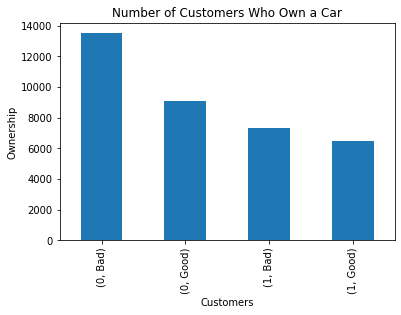

In [407]:
 # Specify the customers who own a car

g1= customer_record.groupby('Own_Car')['Status'].value_counts().plot(kind='bar')
g1.set_title("Number of Customers Who Own a Car")
g1.set_xlabel("Customers")
g1.set_ylabel("Ownership")

plt.show()

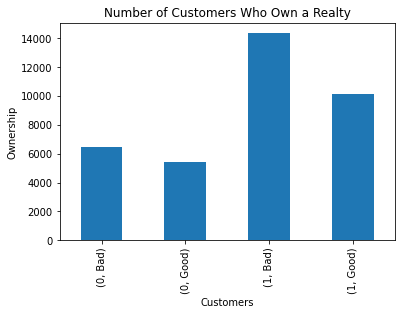

In [408]:
# Specify the customers who own a realty

g1= customer_record.groupby('Own_Realty')['Status'].value_counts().plot(kind='bar')
g1.set_title("Number of Customers Who Own a Realty")
g1.set_xlabel("Customers")
g1.set_ylabel("Ownership")

plt.show()

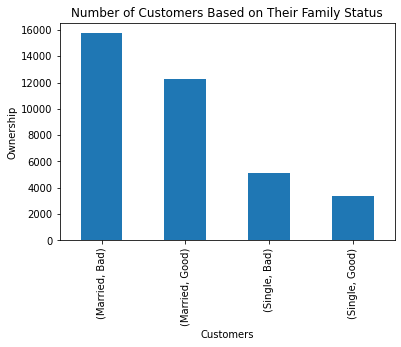

In [409]:
# Specify the customers based on their family status

g1= customer_record.groupby('Family_Status')['Status'].value_counts().plot(kind='bar')
g1.set_title("Number of Customers Based on Their Family Status")
g1.set_xlabel("Customers")
g1.set_ylabel("Ownership")

plt.show()

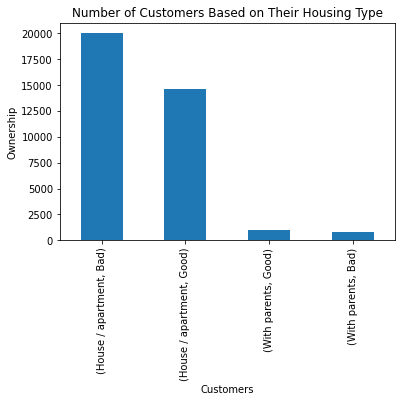

In [410]:
# Specify the customers based on their housing type

g1= customer_record.groupby('Housing_Type')['Status'].value_counts().plot(kind='bar')
g1.set_title("Number of Customers Based on Their Housing Type")
g1.set_xlabel("Customers")
g1.set_ylabel("Ownership")

plt.show()

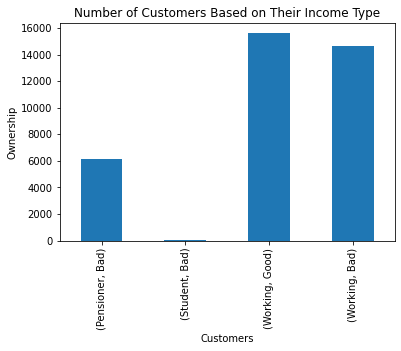

In [411]:
# Specify the customers based on their income type

g1= customer_record.groupby('Income_Type')['Status'].value_counts().plot(kind='bar')
g1.set_title("Number of Customers Based on Their Income Type")
g1.set_xlabel("Customers")
g1.set_ylabel("Ownership")

plt.show()